In [345]:
import numpy as np
import matplotlib.pyplot as plt

In [346]:
def f(x):
    return np.cos(x)*np.cos(x)

In [347]:
a = -1.5 #Левая граница
b = 1.5 # Правая граница
s = 100 # Количество узлов сетки
h = (b-a)/s # Шаг сетки

# Равномерная сетка с добавлением крайних точек
x_plus_h = np.linspace(a - h, b + h, s + 2) 
f_x_h = [0]*(s+2)

for i in range(s):
    f_x_h[i] = f(x_plus_h[i])
    
# Равномерная сетка без добавления точки
x = np.linspace(a,b,s) 
f_x = [0]*s

for i in range(s):
    f_x[i] = f(x[i])

In [348]:
# Формула производной
def diff(x):
    return (-2) * np.cos(x) * np.sin(x)

# Центральная разность
def diff_center(k, x_test):
    return (f(x_test[k+1]) - f(x_test[k-1])) / ((x_test[k+1] - x_test[k-1]))

# Правая разность
def diff_rigth(k, x_test):
    return (f(x_test[k+1]) - f(x_test[k])) / (x_test[k+1] - x_test[k])

# Вторая производная
def second_diff(k):
    return -2*np.cos(2*k)

# Разложение второй производной для второго порядка
def second_diff_2(h, i, f_x):
    return (1/(h*h))*(f_x[i + 1] + f_x[i - 1] - 2*f_x[i])

# Разложение второй производной для четвертого порядка
def second_diff_4(h, i, f_x):
    return (1/((-12)*h*h))*((f_x[i - 2] + f_x[i + 2]) - 16*(f_x[i - 1] + f_x[i + 1]) + 30*f_x[i])

# Разложение для центральной разности в крайней левой точке, второй порядок точности
def second_diff_2_l(h, n, f_arr):
    return (1/(h*h))*(2*f_arr[n]-5*f_arr[n+1]+4*f_arr[n+2]-f_arr[n+3])

# Разложение для центральной разности в крайней правой точке, второй порядок точности
def second_diff_2_r(h, n, f_arr):
    return (1/(h*h))*(2*f_arr[n]-5*f_arr[n-1]+4*f_arr[n-2]-f_arr[n-3])
# Разложение для центральной разности в крайней левой точке, четвертый порядок точности
def second_diff_4_l(h, n, f_arr):
    return (1/(h*h))*((15/4)*f_arr[n]-(77/6)*f_arr[n+1]+(107/6)*f_arr[n+2]-13*f_arr[n+3] + (61/12)*f_arr[n+4] - (5/6)*f_arr[n+5])

# Разложение для центральной разности в крайней правой точке, четвертый порядок точности
def second_diff_4_r(h, n, f_arr):
    return (1/(h*h))*((15/4)*f_arr[n]-(77/6)*f_arr[n-1]+(107/6)*f_arr[n-2]-13*f_arr[n-3] + (61/12)*f_arr[n-4] - (5/6)*f_arr[n-5])

In [349]:
diff_x = [0]*s # Прямые значения производной
diff_f_x_c = [0]*s # Массив для центральной разности
diff_f_x_r = [0]*s # Массив для правой разности

for k in range(1, s+1):
    diff_f_x_c[k-1] = diff_center(k, x_plus_h)
        
for k in range(s-1):
    diff_f_x_r[k] = diff_rigth(k, x)
    
for k in range(s):
    diff_x[k] = diff(x[k])

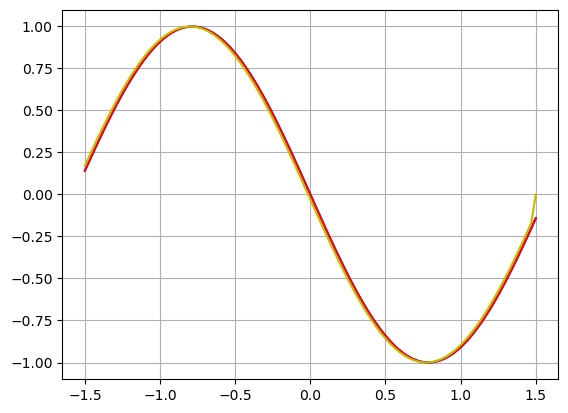

In [350]:
plt.grid()
plt.plot(x, diff_x, 'b') # График производной
plt.plot(x, diff_f_x_c, 'r') # График значений производной по центральным разностям
plt.plot(x, diff_f_x_r, 'y'); # График значений производной по правым разностя

In [351]:
diff_2 = [0]*s # Прямые значения второй производной
diff_2_x = [0]*s # Массив для центральной разности второй порядок
diff_4_x = [0]*s # Массив для центральной разности четвёртый порядок

hh = (b-a)/s # Шаг сетки


for k in range(s):
    diff_2[k] = second_diff(x[k])
    
    # Второй порядок точности
    if k == 0:
        diff_2_x[k] = second_diff_2_l(hh, k, f_x)
        
    elif k == s-1:
        diff_2_x[k] = second_diff_2_r(hh, k, f_x)
        
    else:
        diff_2_x[k] = second_diff_2(hh, k, f_x)
    
    # Четвёртый порядок точности
    if k == 0 or k == 1:
        diff_4_x[k] = second_diff_4_l(hh, k, f_x)
        
    elif k == s-2 or k == s-1:
        diff_4_x[k] = second_diff_4_r(hh, k, f_x)
        
    else:
        diff_4_x[k] = second_diff_4(hh, k, f_x)

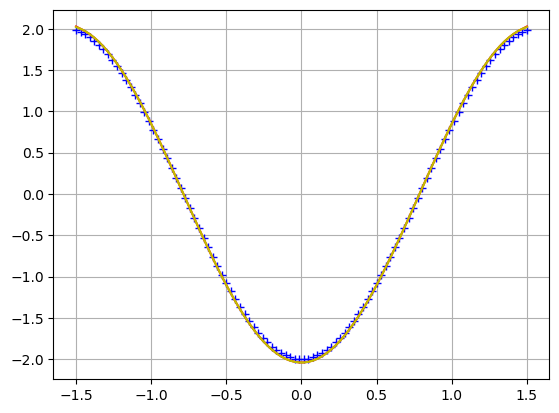

In [352]:
plt.grid()
plt.plot(x,  diff_2, '+', color = 'b')
plt.plot(x,  diff_2_x, color = 'r')
plt.plot(x,  diff_4_x, color = 'y');

In [353]:
h_array = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

h_for_cent = [0]*len(h_array)
h_for_right = [0]*len(h_array)
h_for_cent_2 = [0]*len(h_array)
h_for_cent_4 = [0]*len(h_array)

for hh in h_array:
#################################################   
    s = int((b - a)/hh)
    x = np.linspace(a,b,s) 
    f_x = [0]*s

    for i in range(s):
        f_x[i] = f(x[i])
################################################# 

    x_plus_h = np.linspace(a - hh, b + hh, s + 2) 
    f_x_h = [0]*(s+2)

    for i in range(s):
        f_x_h[i] = f(x_plus_h[i])
#################################################
    first_c = [0]*s
    first_r = [0]*s
    second_c_2 = [0]*s
    second_c_4 = [0]*s
#################################################
    for k in range(1, s+1):
        diff_f_x_c[k-1] = diff_center(k, x_plus_h)
        
    for k in range(s-1):
        diff_f_x_r[k] = diff_rigth(k, x)
        
    for k in range(s):
        diff_x[k] = diff(x[k])
        
    # Массивы ошибок для каждой hh:
    for k in range(s):
        first_c[k] =  abs(diff_x[k] - diff_f_x_c[k])
        first_r[k] = abs(diff_x[k] - diff_f_x_r[k])
    h_for_cent[h_array.index(hh)] = max(first_c)
    h_for_right[h_array.index(hh)] = max(first_r)
    
#################################################
    for k in range(s):
        diff_2[k] = second_diff(x[k])
    
        # Второй порядок точности
        if k == 0:
            diff_2_x[k] = second_diff_2_l(hh, k, f_x)

        elif k == s-1:
            diff_2_x[k] = second_diff_2_r(hh, k, f_x)

        else:
            diff_2_x[k] = second_diff_2(hh, k, f_x)

        # Четвёртый порядок точности
        if k == 0 or k == 1:
            diff_4_x[k] = second_diff_4_l(hh, k, f_x)

        elif k == s-2 or k == s-1:
            diff_4_x[k] = second_diff_4_r(hh, k, f_x)

        else:
            diff_4_x[k] = second_diff_4(hh, k, f_x)
        
    
    for k in range(s):
        second_c_2[k] = abs(diff_2[k] - diff_2_x[k])
        second_c_4[k] = abs(diff_2[k] - diff_4_x[k])
    h_for_cent_2[h_array.index(hh)] = max(second_c_2)
    h_for_cent_4[h_array.index(hh)] = max(second_c_4)
    
h_array_log = [np.log(i) for i in h_array]
h_for_cent_log = [np.log(i) for i in h_for_cent]
h_for_right_log = [np.log(i) for i in h_for_right]
h_for_cent_2_log = [np.log(i) for i in h_for_cent_2]
h_for_cent_4_log = [np.log(i) for i in h_for_cent_4]

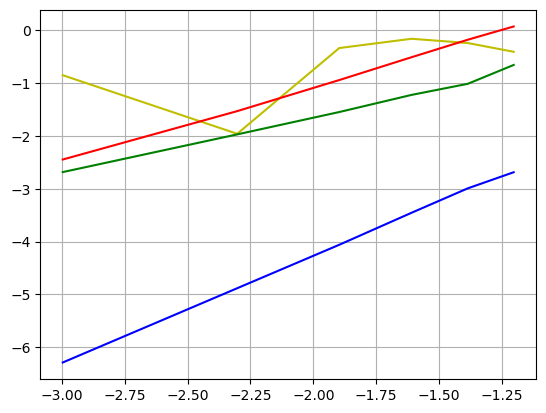

In [354]:
plt.grid()
plt.plot(h_array_log, h_for_cent_log, 'b')
plt.plot(h_array_log, h_for_right_log, 'y')
plt.plot(h_array_log, h_for_cent_2_log, 'r')
plt.plot(h_array_log, h_for_cent_4_log, 'g');